#**Data Understanding & Data Preparation**

Sumber data [Pendapatan anime di Box Office](https://www.kaggle.com/datasets/ajeeshreegana/anime-dataset-box-office)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Menganalisis faktor-faktor yang memengaruhi kesuksesan box office film anime, langkah pertama yang harus dilakukan adalah mengumpulkan data dari kaggle yang telah saya downloand sebelumnya, yaitu sebagai berikut:

In [6]:
df = pd.read_csv("/content/drive/MyDrive/AVD MINPRO 1/top_1000_animes.csv")

df

,anime_id,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office
0,16498,Attack on Titan,"Action, Drama, Fantasy, Mystery",TV,25,84,778095,200000,30.8
1,101922,Demon Slayer,"Action, Adventure, Drama, Fantasy, Supernatural",TV,26,83,735876,250000,504.5
2,1535,DEATH NOTE,"Mystery, Psychological, Supernatural, Thriller",TV,37,84,708493,100000,30.0
3,113415,Jujutsu Kaisen,"Action, Drama, Supernatural",TV,24,85,677899,250000,196.0
4,21459,My Hero Academia,"Action, Adventure, Comedy",TV,13,77,672551,200000,55.0
...,...,...,...,...,...,...,...,...,...
995,97663,Knights & Magic,"Action, Fantasy, Mecha",TV,13,67,52265,150000,33.0
996,136707,Isekai Yakkyoku,Fantasy,TV,12,72,52175,250000,35.0
997,129192,Tensei Kenja no Isekai Life: Daini no Shokugyo...,"Action, Adventure, Comedy, Fantasy",TV,12,61,52116,300000,39.0
998,127271,Ryuu to Sobakasu no Hime,"Drama, Music, Mystery, Sci-Fi",MOVIE,1,73,52055,300000,56.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   anime_id            1000 non-null   int64  
 1   anime_name          1000 non-null   object 
 2   genres              1000 non-null   object 
 3   type                1000 non-null   object 
 4   number_of_episodes  1000 non-null   int64  
 5   rating              1000 non-null   int64  
 6   total_views         1000 non-null   int64  
 7   production_cost     1000 non-null   int64  
 8   total_box_office    1000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


## **Data Cleaning**

 Setelah data terkumpul, data tersebut perlu dibersihkan dengan membuang data yang tidak lengkap atau tidak valid dengan data cleaning yang merupakan proses menghapus atau memodifikasi data yang tidak lengkap, duplikat, tidak akurat, dan salah format. Data-data tersebut dihapus atau dimodifikasi untuk memastikan data yang sedang diolah adalah data berkualitas agar dapat menghasilkan keputusan yang lebih akurat.

###Melihat Missing

Melakukan pengecekan missing values perkolom dalam bentuk presentase, guna mendukung pengambilan keputusan pada nilai yang kosong

In [8]:
print((df.isna().sum() / len(df)) * 100)

anime_id              0.0
anime_name            0.0
genres                0.0
type                  0.0
number_of_episodes    0.0
rating                0.0
total_views           0.0
production_cost       0.0
total_box_office      0.0
dtype: float64


In [9]:
df.isnull().sum()

,0
anime_id,0
anime_name,0
genres,0
type,0
number_of_episodes,0
rating,0
total_views,0
production_cost,0
total_box_office,0


In [10]:
df.describe()

,anime_id,number_of_episodes,rating,total_views,production_cost,total_box_office
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,63084.119000,19.926000,74.667000,136345.578000,201400.000000,35.375300
std,54315.227932,57.600941,7.371733,106097.155245,68649.492007,40.570578
min,1.000000,1.000000,45.000000,52006.000000,100000.000000,7.000000
25%,14501.500000,12.000000,70.000000,69314.000000,150000.000000,20.000000
50%,21693.000000,12.000000,75.000000,97868.500000,200000.000000,33.000000
75%,110880.000000,13.000000,80.000000,158302.250000,250000.000000,46.000000
max,166873.000000,1110.000000,91.000000,778095.000000,300000.000000,1001.000000


 **Duplicated Values**

In [11]:
df.duplicated().sum()

0

 **Outliers**

In [12]:

results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.0
number_of_episodes,41.5
rating,0.8
total_views,8.4
production_cost,0.0
total_box_office,0.8


In [13]:
columns_to_impute = ["production_cost", "total_box_office"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [14]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.0
number_of_episodes,41.5
rating,0.8
total_views,8.4
production_cost,0.0
total_box_office,0.0


**Incosistent Value**

In [15]:
df.describe()

,anime_id,number_of_episodes,rating,total_views,production_cost,total_box_office
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,63084.119000,19.926000,74.667000,136345.578000,201400.000000,33.262500
std,54315.227932,57.600941,7.371733,106097.155245,68649.492007,15.974517
min,1.000000,1.000000,45.000000,52006.000000,100000.000000,7.000000
25%,14501.500000,12.000000,70.000000,69314.000000,150000.000000,20.000000
50%,21693.000000,12.000000,75.000000,97868.500000,200000.000000,33.000000
75%,110880.000000,13.000000,80.000000,158302.250000,250000.000000,46.000000
max,166873.000000,1110.000000,91.000000,778095.000000,300000.000000,85.000000


## **Construct Data**

In [16]:
df["profit_margin"] = (df["total_box_office"] - df["production_cost"]) / df["production_cost"]
df

,anime_id,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office,profit_margin
0,16498,Attack on Titan,"Action, Drama, Fantasy, Mystery",TV,25,84,778095,200000,30.8,-0.999846
1,101922,Demon Slayer,"Action, Adventure, Drama, Fantasy, Supernatural",TV,26,83,735876,250000,85.0,-0.999660
2,1535,DEATH NOTE,"Mystery, Psychological, Supernatural, Thriller",TV,37,84,708493,100000,30.0,-0.999700
3,113415,Jujutsu Kaisen,"Action, Drama, Supernatural",TV,24,85,677899,250000,85.0,-0.999660
4,21459,My Hero Academia,"Action, Adventure, Comedy",TV,13,77,672551,200000,55.0,-0.999725
...,...,...,...,...,...,...,...,...,...,...
995,97663,Knights & Magic,"Action, Fantasy, Mecha",TV,13,67,52265,150000,33.0,-0.999780
996,136707,Isekai Yakkyoku,Fantasy,TV,12,72,52175,250000,35.0,-0.999860
997,129192,Tensei Kenja no Isekai Life: Daini no Shokugyo...,"Action, Adventure, Comedy, Fantasy",TV,12,61,52116,300000,39.0,-0.999870
998,127271,Ryuu to Sobakasu no Hime,"Drama, Music, Mystery, Sci-Fi",MOVIE,1,73,52055,300000,56.0,-0.999813


## **Data Reduction**

In [17]:
if 'anime_id' in df.columns:
    df.drop("anime_id", axis=1, inplace=True)
else:
    print("Column 'anime_id' not found in the DataFrame.")

df

,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office,profit_margin
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",TV,25,84,778095,200000,30.8,-0.999846
1,Demon Slayer,"Action, Adventure, Drama, Fantasy, Supernatural",TV,26,83,735876,250000,85.0,-0.999660
2,DEATH NOTE,"Mystery, Psychological, Supernatural, Thriller",TV,37,84,708493,100000,30.0,-0.999700
3,Jujutsu Kaisen,"Action, Drama, Supernatural",TV,24,85,677899,250000,85.0,-0.999660
4,My Hero Academia,"Action, Adventure, Comedy",TV,13,77,672551,200000,55.0,-0.999725
...,...,...,...,...,...,...,...,...,...
995,Knights & Magic,"Action, Fantasy, Mecha",TV,13,67,52265,150000,33.0,-0.999780
996,Isekai Yakkyoku,Fantasy,TV,12,72,52175,250000,35.0,-0.999860
997,Tensei Kenja no Isekai Life: Daini no Shokugyo...,"Action, Adventure, Comedy, Fantasy",TV,12,61,52116,300000,39.0,-0.999870
998,Ryuu to Sobakasu no Hime,"Drama, Music, Mystery, Sci-Fi",MOVIE,1,73,52055,300000,56.0,-0.999813


In [18]:
df.describe()

,number_of_episodes,rating,total_views,production_cost,total_box_office,profit_margin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.926000,74.667000,136345.578000,201400.000000,33.262500,-0.999812
std,57.600941,7.371733,106097.155245,68649.492007,15.974517,0.000117
min,1.000000,45.000000,52006.000000,100000.000000,7.000000,-0.999977
25%,12.000000,70.000000,69314.000000,150000.000000,20.000000,-0.999900
50%,12.000000,75.000000,97868.500000,200000.000000,33.000000,-0.999836
75%,13.000000,80.000000,158302.250000,250000.000000,46.000000,-0.999750
max,1110.000000,91.000000,778095.000000,300000.000000,85.000000,-0.999410


In [19]:
df

,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office,profit_margin
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",TV,25,84,778095,200000,30.8,-0.999846
1,Demon Slayer,"Action, Adventure, Drama, Fantasy, Supernatural",TV,26,83,735876,250000,85.0,-0.999660
2,DEATH NOTE,"Mystery, Psychological, Supernatural, Thriller",TV,37,84,708493,100000,30.0,-0.999700
3,Jujutsu Kaisen,"Action, Drama, Supernatural",TV,24,85,677899,250000,85.0,-0.999660
4,My Hero Academia,"Action, Adventure, Comedy",TV,13,77,672551,200000,55.0,-0.999725
...,...,...,...,...,...,...,...,...,...
995,Knights & Magic,"Action, Fantasy, Mecha",TV,13,67,52265,150000,33.0,-0.999780
996,Isekai Yakkyoku,Fantasy,TV,12,72,52175,250000,35.0,-0.999860
997,Tensei Kenja no Isekai Life: Daini no Shokugyo...,"Action, Adventure, Comedy, Fantasy",TV,12,61,52116,300000,39.0,-0.999870
998,Ryuu to Sobakasu no Hime,"Drama, Music, Mystery, Sci-Fi",MOVIE,1,73,52055,300000,56.0,-0.999813


# **Matplotlib & Seaborn**

### Perbandingan Biaya Produksi dan Pendapatan Box Office

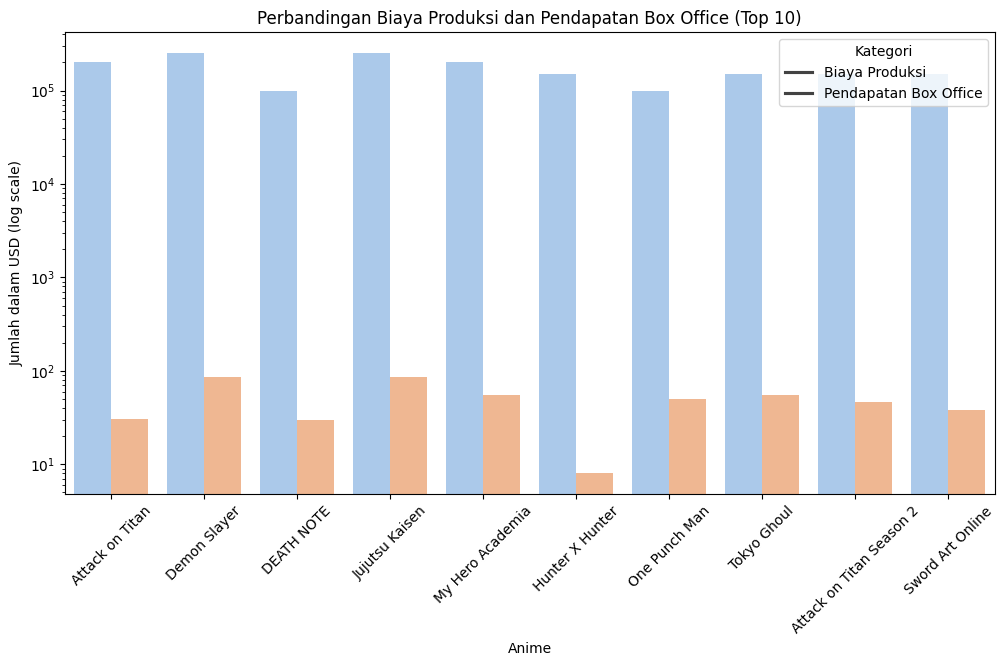

In [56]:
df_clean = df[(df['production_cost'] > 0) & (df['total_box_office'] > 0)].copy()
df_top10 = df_clean.head(10)
df_melted = df_top10.melt(id_vars="anime_name", value_vars=["production_cost", "total_box_office"], var_name="Kategori", value_name="Jumlah")
plt.figure(figsize=(12, 6))
sns.barplot(x="anime_name", y="Jumlah", hue="Kategori", data=df_melted, palette="pastel")
plt.yscale("log")
plt.title("Perbandingan Biaya Produksi dan Pendapatan Box Office (Top 10)")
plt.xlabel("Anime")
plt.ylabel("Jumlah dalam USD (log scale)")
plt.xticks(rotation=45)
plt.legend(title="Kategori", labels=["Biaya Produksi", "Pendapatan Box Office"])
plt.show()

### Diagram Batang Rata-rata pendapatan berdasarkan genre

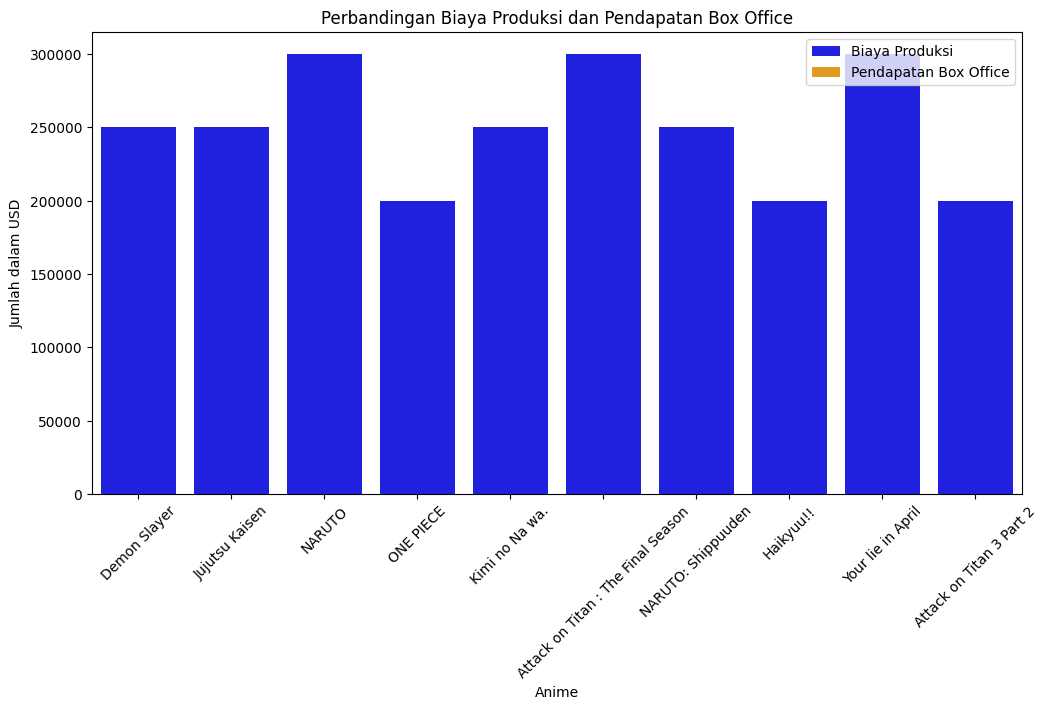

In [55]:
top_anime = df.nlargest(10, 'total_box_office')
plt.figure(figsize=(12, 6))
sns.barplot(x='anime_name', y='production_cost', data=top_anime, color='blue', label='Biaya Produksi')
sns.barplot(x='anime_name', y='total_box_office', data=top_anime, color='orange', alpha=1.0, label='Pendapatan Box Office')
plt.xlabel("Anime")
plt.ylabel("Jumlah dalam USD")
plt.xticks(rotation=45)
plt.title("Perbandingan Biaya Produksi dan Pendapatan Box Office")
plt.legend()
plt.show()

Beberapa anime dengan pendapatan box office tertinggi adalah [sebutkan anime dari visualisasi].

Perbandingan ini menunjukkan bahwa anime dengan biaya produksi tinggi tidak selalu memiliki pendapatan tinggi.

### Diagram Garis (Tren pendapatan box office terhadap rating)

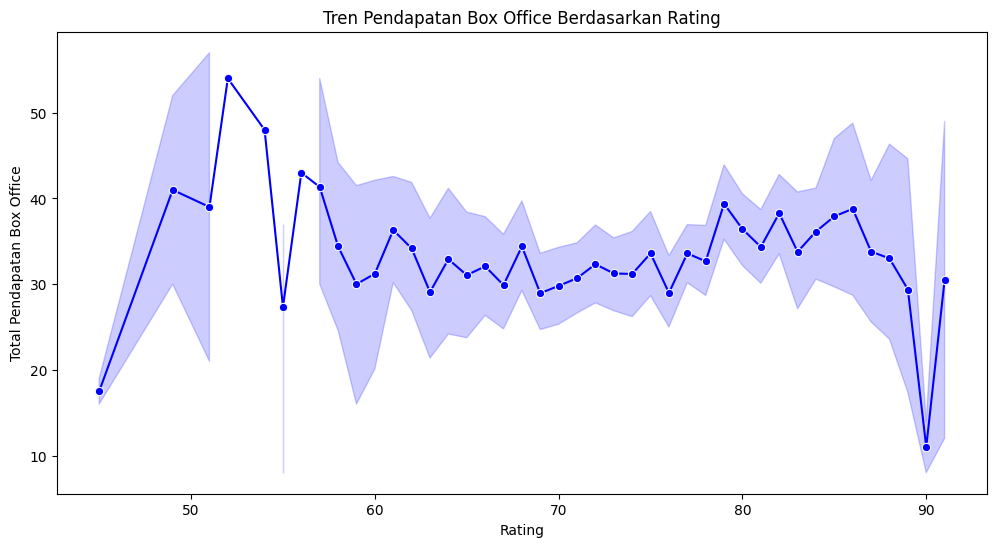

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["rating"], y=df["total_box_office"], marker="o", color='blue')
plt.xlabel("Rating")
plt.ylabel("Total Pendapatan Box Office")
plt.title("Tren Pendapatan Box Office Berdasarkan Rating")
plt.show()

### Diagram Garis (Hubungan total views dengan pendapatan box office)

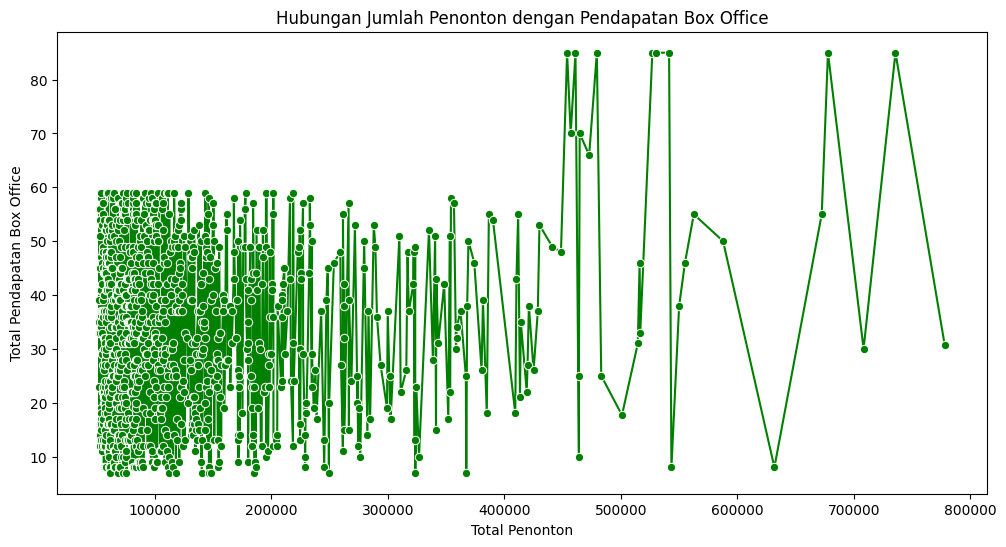

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["total_views"], y=df["total_box_office"], marker="o", color='green')
plt.xlabel("Total Penonton")
plt.ylabel("Total Pendapatan Box Office")
plt.title("Hubungan Jumlah Penonton dengan Pendapatan Box Office")
plt.show()

### Heatmap Korelasi

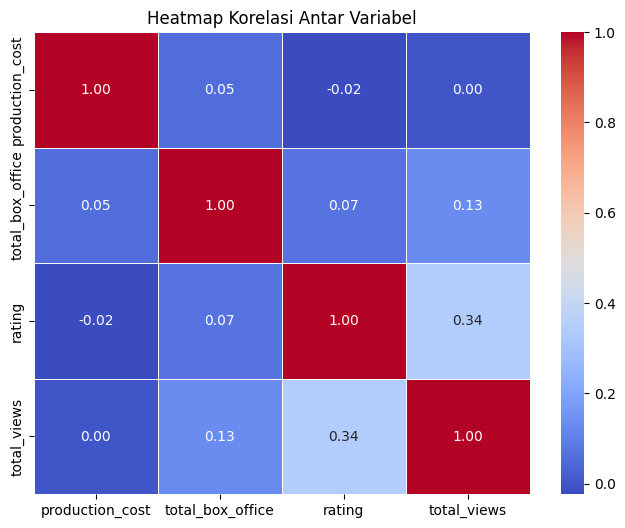

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['production_cost', 'total_box_office', 'rating', 'total_views']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

### Kesimpulan

Dari visualisasi perbandingan Biaya Produksi dan Pendapatan Box Office untuk 10 anime terlaris, dapat diambil beberapa kesimpulan:

1. Pendapatan jauh melebihi biaya produksi, secara umum anime yang memiliki biaya produksi tinggi juga menghasilkan pendapatan box office yang besar Contoh: Jujutsu Kaisen dan Demon Slayer terlihat memiliki pendapatan yang sangat tinggi dibandingkan dengan biaya produksinya.

2. Ada beberapa anime dengan biaya produksi yang relatif tinggi tetapi pendapatannya tidak terlalu besar. Misalnya, jika ada anime dengan biaya produksi yang hampir sama dengan pendapatannya, berarti laba atas investasinya (ROI) tidak terlalu tinggi.

3. Pengaruh genre dan popularitas, anime dengan genre action/shounen seperti Attack on Titan, Jujutsu Kaisen, dan Demon Slayer cenderung memiliki pendapatan yang lebih tinggi dibandingkan anime dengan genre lainnya. - Popularitas anime sebelum filmnya dirilis juga sangat menentukan kesuksesan box office.

4. Peluang dan strategi yang bisa dilakukan dan jika tujuan produksi adalah keuntungan maksimal, maka studio bisa lebih fokus pada anime yang punya basis penggemar kuat sebelum dirilis. Serta promosi dan distribusi internasional memegang peranan besar dalam meningkatkan pendapatan box office.